In [1]:
import os
from subprocess import Popen, PIPE
import numpy as np
import matplotlib.pyplot as plt

#Hugo code
import Datasets
import Utility

In [2]:
#plan


#get data (for each gate/phantom)
#look at data (all matrices)


In [3]:
intermediate_folder = r"C:/Users/petct/Desktop/Hugo/Code/PythonMEX/normalised_sinograms/intermediates"
    
subdirs = []
with os.scandir(intermediate_folder) as it:
    for entry in it:
        if entry.is_dir():
            print("dir entry name:",  entry.name)
            subdirs.append(entry.name)

dir entry name: CylinderPET-00
dir entry name: CylinderPET-01
dir entry name: KanylPET-00
dir entry name: KanylPET-01


sinogram_shape (621, 168, 400)
sinogram_size 41731200
file size [elements] 584236800
ratio sinogram/file 0.07142857142857142


C:\Users\petct\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


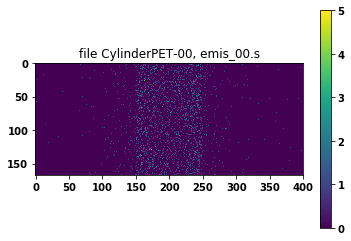

file size [elements] 542505600
ratio sinogram/file 0.07692307692307693


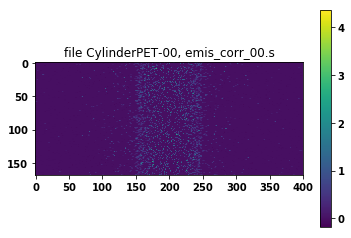

file size [elements] 41731200
ratio sinogram/file 1.0


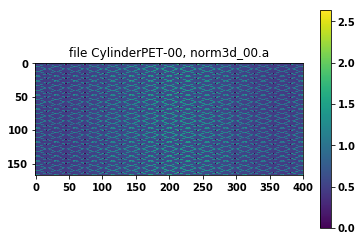

file size [elements] 584236800
ratio sinogram/file 0.07142857142857142


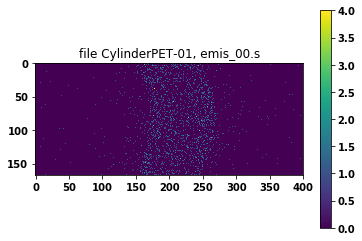

file size [elements] 542505600
ratio sinogram/file 0.07692307692307693


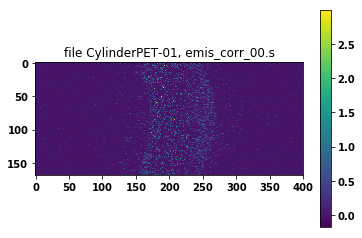

file size [elements] 41731200
ratio sinogram/file 1.0


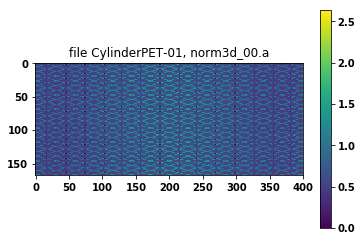

file size [elements] 584236800
ratio sinogram/file 0.07142857142857142


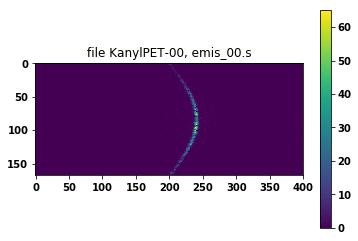

file size [elements] 542505600
ratio sinogram/file 0.07692307692307693


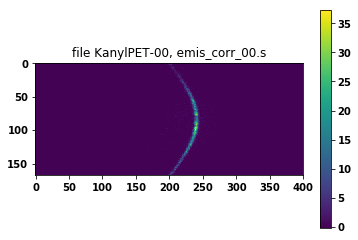

file size [elements] 41731200
ratio sinogram/file 1.0


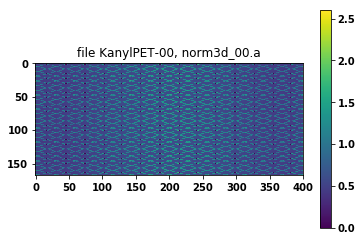

file size [elements] 584236800
ratio sinogram/file 0.07142857142857142


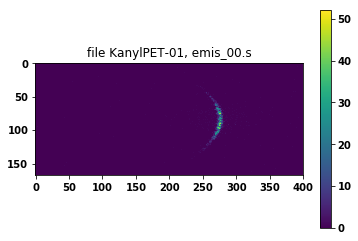

file size [elements] 542505600
ratio sinogram/file 0.07692307692307693


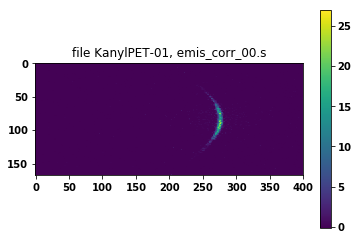

file size [elements] 41731200
ratio sinogram/file 1.0


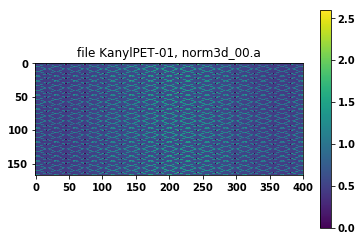

done


In [4]:
intermediate_files = ["emis_00.s", "emis_corr_00.s", "norm3d_00.a"]
#common for all, relevant data from header files
#number format := float
#number of bytes per pixel := 4
#4*8=32
#... but the file sizes vary
# uncompressed sinogram: 1 168 473 600 bytes  (16 bit int)
# emis :                 2 336 947 200 bytes
# emis corr:             2 170 022 400 bytes
# 

datatype= np.float32
sinogram_shape=(621,168,400)
sinograms_3D = []
verbose = True
if verbose:
    print("sinogram_shape", sinogram_shape)
    print("sinogram_size", np.prod(sinogram_shape))

mi = 50
for den in subdirs:
    temp = []
    for k, inter in enumerate(intermediate_files):
        path = intermediate_folder + r"/" + den + r"/" + inter
        with open(path, 'rb') as file:
            sino_1D = np.fromfile(file, dtype=datatype)
        
        if verbose:
            print("file size [elements]", np.size(sino_1D))
            print("ratio sinogram/file", np.prod(sinogram_shape)/np.size(sino_1D))
            
        count = np.prod(sinogram_shape)
        sino_3D = np.reshape(sino_1D[:count], newshape=sinogram_shape, order='C')
        if verbose:
            plt.imshow(sino_3D[mi])
            plt.title("file " + den + ", " + inter)
            plt.colorbar()
            plt.show()
        
            
        temp.append(sino_3D)
    sinograms_3D.append(temp)
print("done")

In [5]:
#check if the normalization sinograms differ
verbose = True
if verbose:
    ref = 0
    norm_index = -1
    total = np.sum(sinograms_3D[ref][norm_index])
    print("sum of normalization sinogram", ref, "is", total)
    for k in range(len(sinograms_3D)):
        if k != ref:
            print("sinogram pair", ref, k)
            diff = sinograms_3D[ref][norm_index] - sinograms_3D[k][norm_index]
            diff_sum = np.sum(diff)
            print("sum difference is", diff_sum)
            print("ratio with total is", diff_sum/total)

sum of normalization sinogram 0 is 25639094.0
sinogram pair 0 1
sum difference is -6894.5654
ratio with total is -0.0002689083
sinogram pair 0 2
sum difference is 309691.6
ratio with total is 0.012078882
sinogram pair 0 3
sum difference is 266749.38
ratio with total is 0.010404009


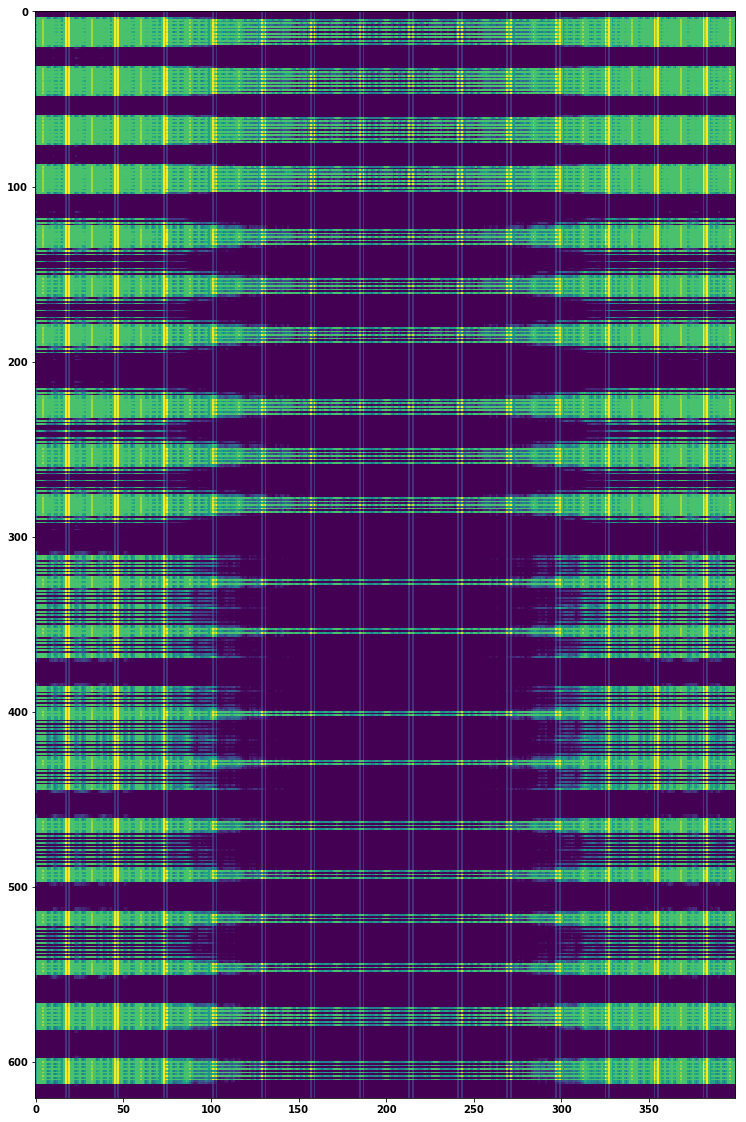

In [6]:
norm = sinograms_3D[0][norm_index]
norm0 = np.array(norm <0.3,dtype=int)
plt.figure(figsize=(20,20))
plt.imshow(np.sum(norm0, axis=1))
plt.show()

In [7]:
np.mean(1/(norm+0.4))

1.1703027

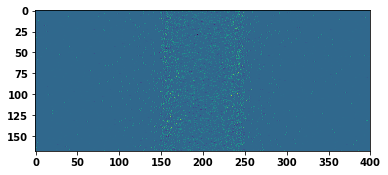

In [8]:
#difference
data_number = 0
mi = 50
plt.imshow(sinograms_3D[data_number][0][mi]-sinograms_3D[data_number][1][mi])
plt.show()

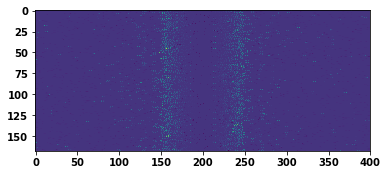

In [9]:
# "ratio"
data_number = 0
mi = 50
plt.imshow(sinograms_3D[data_number][1][mi] / (sinograms_3D[data_number][0][mi]+1e-6))
plt.show()